### 차분(Difference): `diff`

In [ ]:
dd.ts

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1342,1442,1252,1343
2017,1425,1362,1256,1272
2018,1243,1359,1412,1253
2019,1201,1478,1322,1406
2020,1254,1289,1497,1208


In [ ]:
diff(dd.ts)

,Qtr1,Qtr2,Qtr3,Qtr4
2016,,100,-190,91
2017,82,-63,-106,16
2018,-29,116,53,-159
2019,-52,277,-156,84
2020,-152,35,208,-289


In [ ]:
diff(dd.ts, 2) # lag=2

,Qtr1,Qtr2,Qtr3,Qtr4
2016,,,-90,-99
2017,173,19,-169,-90
2018,-13,87,169,-106
2019,-211,225,121,-72
2020,-68,-117,243,-81


In [ ]:
diff(dd.ts, 1, 2) # lag=1, diff를 2번 함

,Qtr1,Qtr2,Qtr3,Qtr4
2016,,,-290,281
2017,-9,-145,-43,122
2018,-45,145,-63,-212
2019,107,329,-433,240
2020,-236,187,173,-497


In [ ]:
diff(diff(dd.ts))

,Qtr1,Qtr2,Qtr3,Qtr4
2016,,,-290,281
2017,-9,-145,-43,122
2018,-45,145,-63,-212
2019,107,329,-433,240
2020,-236,187,173,-497


In [ ]:
cycle(dd.ts)

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1,2,3,4
2017,1,2,3,4
2018,1,2,3,4
2019,1,2,3,4
2020,1,2,3,4


In [ ]:
cycle(lag(dd.ts, k=2))

,Qtr1,Qtr2,Qtr3,Qtr4
2015,,,3,4
2016,1,2,3,4
2017,1,2,3,4
2018,1,2,3,4
2019,1,2,3,4
2020,1,2,,


### 역차분(Inverse Difference): `diffinv`

In [ ]:
(d1 <- diff(dd.ts))
(d2 <- diffinv(d1.ts))

,Qtr1,Qtr2,Qtr3,Qtr4
2016,,100,-190,91
2017,82,-63,-106,16
2018,-29,116,53,-159
2019,-52,277,-156,84
2020,-152,35,208,-289


ERROR: ignored

In [ ]:
# 추가
for (i in 1:length(dd.ts))  # R에서는 Python과 달리 첫번째 element를 1로 봅니다 
d3 = d2 + dd.ts[1:1]        # for문을 이용하여 역차분 값에 원래 시계열 관측치의 초기값을 각각 더해줍니다 # 1342
d3                          # 차분 전 원래 조사자료로 환원시킴

,Qtr1,Qtr2,Qtr3,Qtr4
2015,,,,1342
2016,2684,4126,5378,6721
2017,8146,9508,10764,12036
2018,13279,14638,16050,17303
2019,18504,19982,21304,22710
2020,23964,25253,26750,27958


### 시계열 합집합: `ts.union`

In [ ]:
# 1~4까지의 숫자를 8 * 3 크기 형태로 넣어달라.
# 다변량 시계열
prod1 <- ts(matrix(1:24, 8, 3), s=c(2019, 1), f=4, names=c("web", "app", "hyb"))
prod1

prod2 <- ts(matrix(11:22, 4, 3), s=c(2020, 1), f=4, names=c("web", "app", "hyb"))
prod2

,web,app,hyb
2019 Q1,1,9,17
2019 Q2,2,10,18
2019 Q3,3,11,19
2019 Q4,4,12,20
2020 Q1,5,13,21
2020 Q2,6,14,22
2020 Q3,7,15,23
2020 Q4,8,16,24


,web,app,hyb
2020 Q1,11,15,19
2020 Q2,12,16,20
2020 Q3,13,17,21
2020 Q4,14,18,22


In [ ]:
union(prod1, prod2) ## 일반적 합집합 # 잘못된 예

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24

In [ ]:
ts.union(prod1, prod2) ## 시계열 합집합 ## 결측값은 NA

,prod1.web,prod1.app,prod1.hyb,prod2.web,prod2.app,prod2.hyb
2019 Q1,1,9,17,NA,NA,NA
2019 Q2,2,10,18,NA,NA,NA
2019 Q3,3,11,19,NA,NA,NA
2019 Q4,4,12,20,NA,NA,NA
2020 Q1,5,13,21,11,15,19
2020 Q2,6,14,22,12,16,20
2020 Q3,7,15,23,13,17,21
2020 Q4,8,16,24,14,18,22


### 시계열 교집합: `ts.intersect`

In [ ]:
intersect(prod1, prod2) ## 일반적 교집합

[1] 11 12 13 14 15 16 17 18 19 20 21 22

In [ ]:
ts.intersect(prod1, prod2) ## 시계열 교집합

,prod1.web,prod1.app,prod1.hyb,prod2.web,prod2.app,prod2.hyb
2020 Q1,5,13,21,11,15,19
2020 Q2,6,14,22,12,16,20
2020 Q3,7,15,23,13,17,21
2020 Q4,8,16,24,14,18,22


### 시계열 부분추출 및 수정: `window`

In [ ]:
# 관측한 시점에서 일부분만 본다.

In [ ]:
prod1

,web,app,hyb
2019 Q1,1,9,17
2019 Q2,2,10,18
2019 Q3,3,11,19
2019 Q4,4,12,20
2020 Q1,5,13,21
2020 Q2,6,14,22
2020 Q3,7,15,23
2020 Q4,8,16,24


In [ ]:
window(prod1, s=c(2019, 3), delta=1) ## 3분기 자료만 추출
# window(prod1, s=c(2000, 3), delta=1) # 시작시점, 종료시점을 정확히 몰라도 문제없이 결과 생성

,web,app,hyb
2019.5,3,11,19
2020.5,7,15,23


In [ ]:
window(prod1, c(2019, 3), c(2020, 2)) ## 2019-3분기 부터 2020-2분기 까지 부분 추출

,web,app,hyb
2019 Q3,3,11,19
2019 Q4,4,12,20
2020 Q1,5,13,21
2020 Q2,6,14,22


In [ ]:
window(prod2, c(2019, 1), c(2019, 2)) <- c(11, 22)  ## 자료 수정 혹은 추가
prod2

Warning message:
“extending time series when replacing values”


,web,app,hyb
2019 Q1,11,11,11
2019 Q2,22,22,22
2019 Q3,NA,NA,NA
2019 Q4,NA,NA,NA
2020 Q1,11,15,19
2020 Q2,12,16,20
2020 Q3,13,17,21
2020 Q4,14,18,22


### 시계열 통합: `aggregate`

In [ ]:
# 값이 합쳐짐
# aggregate: summary statics(요약 통계량) 또는 집계값을 구했다.
# ex) 평균, 분산, 최빈값, 최소값, 최댓값, 중간값 

In [ ]:
prod1

,web,app,hyb
2019 Q1,1,9,17
2019 Q2,2,10,18
2019 Q3,3,11,19
2019 Q4,4,12,20
2020 Q1,5,13,21
2020 Q2,6,14,22
2020 Q3,7,15,23
2020 Q4,8,16,24


In [ ]:
aggregate(prod1) ## f=4 를 f=1 로 aggregate ## 연도별 자료가 됨!!!

,web,app,hyb
2019,10,42,74
2020,26,58,90


In [ ]:
aggregate(prod1, nf = 2, FUN = mean) ## f=4를 f=2 로 new frequency 설정 후 aggregate ## 반기별 자료가 됨!!! ## 상하반기 평균!!

,web,app,hyb
2019.0,1.5,9.5,17.5
2019.5,3.5,11.5,19.5
2020.0,5.5,13.5,21.5
2020.5,7.5,15.5,23.5


### 평활화(Smoothing)

In [7]:
# 이동평균 평활법 분석사례: filter EDA 

In [35]:
# AirPassenger

data("AirPassengers")
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [36]:
# Moving Average, ma=3이면 내 앞과 뒤 데이터를 가지고 MA를 한다고 볼 수 있음.
ma3 <- filter(AirPassengers, filter=rep(1/3, 3))
ma3

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,NA,120.6667,126.3333,127.3333,128.3333,134.6667,143.6667,144.0000,134.3333,119.6667,113.6667,112.3333
1950,119.6667,127.3333,134.0000,133.6667,136.3333,148.0000,163.0000,166.0000,153.6667,135.0000,129.0000,133.0000
1951,145.0000,157.6667,163.6667,171.0000,171.0000,183.0000,192.0000,194.0000,181.6667,164.0000,158.0000,161.0000
1952,172.3333,181.3333,184.6667,185.6667,194.0000,210.3333,230.0000,227.0000,214.0000,190.6667,185.6667,187.3333
1953,195.3333,209.3333,222.3333,233.3333,235.6667,245.3333,259.6667,257.6667,240.0000,209.3333,197.3333,195.0000
1954,197.6667,209.0000,216.6667,232.0000,241.6667,266.6667,286.3333,284.6667,260.3333,230.3333,220.3333,224.6667
1955,234.6667,247.3333,256.3333,268.6667,284.6667,316.3333,342.0000,341.0000,311.0000,274.3333,263.0000,266.3333
1956,279.6667,292.6667,302.3333,316.0000,335.0000,368.3333,397.3333,391.0000,355.3333,310.6667,294.3333,297.3333
1957,307.3333,324.0000,335.0000,353.0000,375.0000,414.0000,451.3333,445.3333,406.0000,352.0000,329.3333,327.0000
1958,331.3333,340.0000,342.6667,357.6667,382.0000,429.6667,477.0000,466.6667,422.6667,357.6667,335.3333,335.6667


In [11]:
(112+118+132)/3 # 1949년 2월의 3점 이동평균 평활값 # 중심 있음

[1] 120.6667

In [37]:
ma6 <- filter(AirPassengers, filter=rep(1/6, 6))
ma6
ma12 <- filter(AirPassengers, f=rep(1/12, 12))
ma12


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,NA,NA,124.5000,130.5000,135.5000,136.1667,134.5000,131.6667,128.8333,123.3333,119.6667,120.5000
1950,123.1667,126.6667,131.8333,141.0000,148.3333,151.1667,150.8333,149.0000,147.5000,143.3333,140.0000,143.3333
1951,148.3333,158.0000,164.3333,173.3333,181.5000,182.5000,182.3333,178.0000,176.0000,171.3333,168.1667,169.6667
1952,172.8333,179.0000,187.6667,197.5000,207.8333,210.5000,212.1667,210.3333,206.3333,200.6667,193.0000,197.5000
1953,204.8333,214.3333,222.5000,233.8333,246.5000,246.6667,242.6667,234.5000,227.5000,217.5000,203.5000,203.1667
1954,205.8333,214.8333,225.3333,241.6667,259.1667,263.1667,263.5000,258.3333,252.5000,242.5000,232.5000,233.8333
1955,240.5000,251.6667,266.0000,286.3333,305.3333,312.8333,313.6667,308.1667,302.0000,288.6667,277.0000,277.8333
1956,284.3333,297.8333,313.8333,335.3333,356.6667,363.0000,361.8333,354.0000,342.6667,326.3333,309.0000,309.1667
1957,316.1667,330.1667,349.5000,374.5000,402.1667,410.1667,410.0000,401.6667,387.3333,366.5000,341.6667,334.6667
1958,334.8333,344.5000,361.0000,386.1667,417.3333,424.3333,426.1667,417.3333,401.0000,379.1667,352.0000,352.3333


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,NA,NA,NA,NA,NA,126.6667,126.9167,127.5833,128.3333,128.8333,129.1667,130.3333
1950,132.1667,134.0000,135.8333,137.0000,137.8333,139.6667,142.1667,144.1667,147.2500,149.5833,153.5000,155.9167
1951,158.3333,160.7500,162.9167,165.3333,168.0000,170.1667,172.3333,174.8333,176.0833,177.5833,178.5000,181.8333
1952,184.4167,188.0000,190.0833,192.5000,194.6667,197.0000,199.0833,200.4167,204.0000,208.5000,212.3333,214.4167
1953,217.2500,219.7500,222.0833,223.7500,224.4167,225.0000,225.6667,225.0000,224.9167,224.2500,224.6667,226.4167
1954,229.5833,231.3333,233.1667,234.6667,236.5833,238.9167,242.0833,245.8333,248.5000,252.0000,255.0000,259.2500
1955,264.4167,268.9167,273.3333,277.0833,279.9167,284.0000,287.5000,291.1667,295.3333,299.0000,303.0000,307.9167
1956,312.0000,316.8333,320.4167,323.0833,325.9167,328.2500,330.8333,332.8333,336.0833,339.0000,342.0833,346.0833
1957,350.4167,355.5833,359.6667,363.0833,365.9167,368.4167,370.5000,371.9167,372.4167,372.4167,373.0833,374.1667
1958,376.3333,379.5000,379.5000,380.5000,380.9167,381.0000,382.6667,384.6667,388.3333,392.3333,397.0833,400.1667


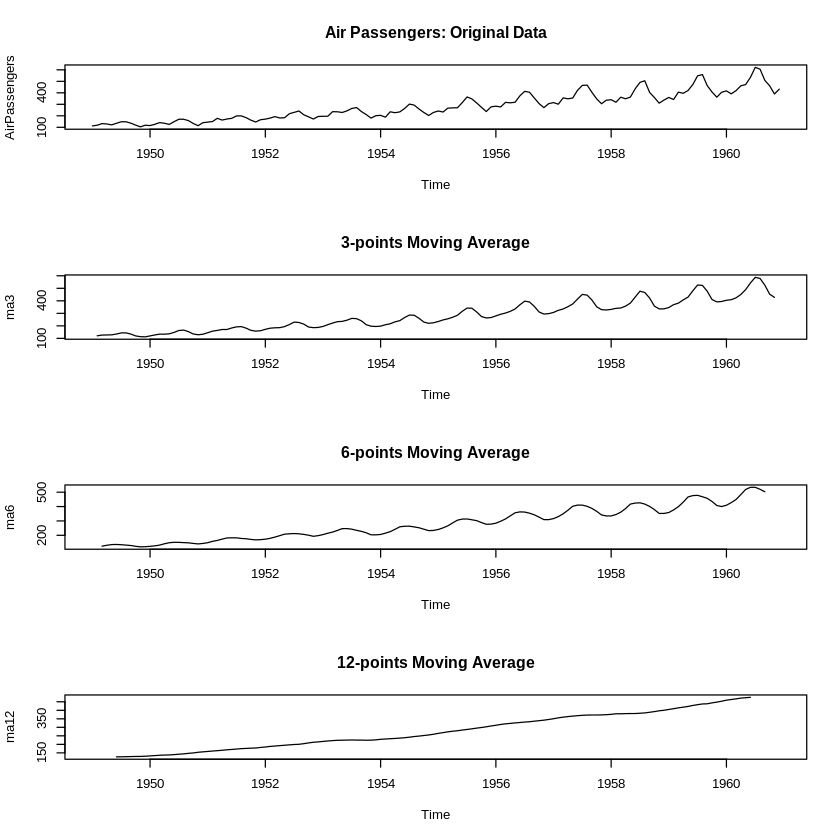

In [43]:
par(mfrow=c(4, 1)) 
plot(AirPassengers, main="Air Passengers: Original Data") # 오리지널 데이터는 계절성, 추세 변동성도 있는 데이터가 나와있다.
plot(ma3, main="3-points Moving Average")
plot(ma6, main="6-points Moving Average")
plot(ma12, main="12-points Moving Average") # 계절성을 아예 없어 버려 over smoothing한 느낌이 든다.
# smoothing의 단점은 계절성이 있는 데이터에 대해 데이터 loss가 있다라는 것이다(정보의 손실이 있다).   

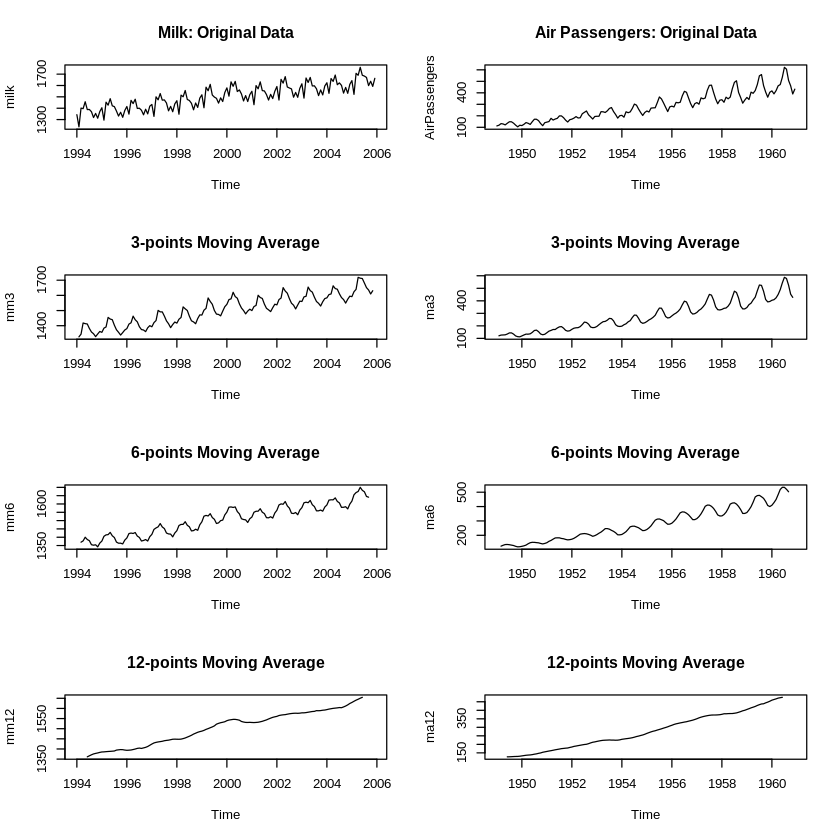

In [39]:
# Milk

library(TSA) 
data(milk)

mm3 <- filter(milk, f=rep(1/3, 3))
mm6 <- filter(milk, f=rep(1/6, 6))
mm12 <- filter(milk, f=rep(1/12, 12))

par(mfcol=c(4, 2)) # mfcol 사용해서 컬럼별로 나눔
plot(milk, main="Milk: Original Data")
plot(mm3, main="3-points Moving Average")
plot(mm6, main="6-points Moving Average")
plot(mm12, main="12-points Moving Average")

plot(AirPassengers, main="Air Passengers: Original Data")
plot(ma3, main="3-points Moving Average")
plot(ma6, main="6-points Moving Average")
plot(ma12, main="12-points Moving Average") 

# airpassenger 데이터와 milk 데이터 모두 추세와 계절성의 변동이 있는 데이터이다.
# milk 데이터는 변동의 추세 폭이 일정한 반면, airpassenger 데이터는 변동의 추세 폭이 점점 넓어진다. 
# airpassenger 데이터가 다루기 더 어렵다.

### 필터링(Filtering)

In [22]:
install.packages('forecast')
library(forecast) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
# 이동평균 평활법 분석사례: filter (4가지 방법)

In [28]:
dd1 <- matrix( c(1342, 1442, 1252, 1343, 	
                1425, 1362, 1256, 1272,
	              1243, 1359, 1412, 1253,					
                1201, 1478, 1322, 1406,
                1254, 1289, 1497, 1208))
  

In [29]:
dd1.ts <- ts(data=dd1, start=c(2016, 1), frequency=4)

In [30]:
dd1.ts

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1342,1442,1252,1343
2017,1425,1362,1256,1272
2018,1243,1359,1412,1253
2019,1201,1478,1322,1406
2020,1254,1289,1497,1208


In [31]:
# 1. 단순 이동평균 평활법(Simple Moving Average Smoothing) 

In [47]:
( ff <- filter(dd1.ts, filter=rep(1, 4)/4, method="convolution", sides=1) ) # 평활상수 filter = 0.25 (m=4)

,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,NA,1344.75
2017,1365.50,1345.50,1346.50,1328.75
2018,1283.25,1282.50,1321.50,1316.75
2019,1306.25,1336.00,1313.50,1351.75
2020,1365.00,1317.75,1361.50,1312.00


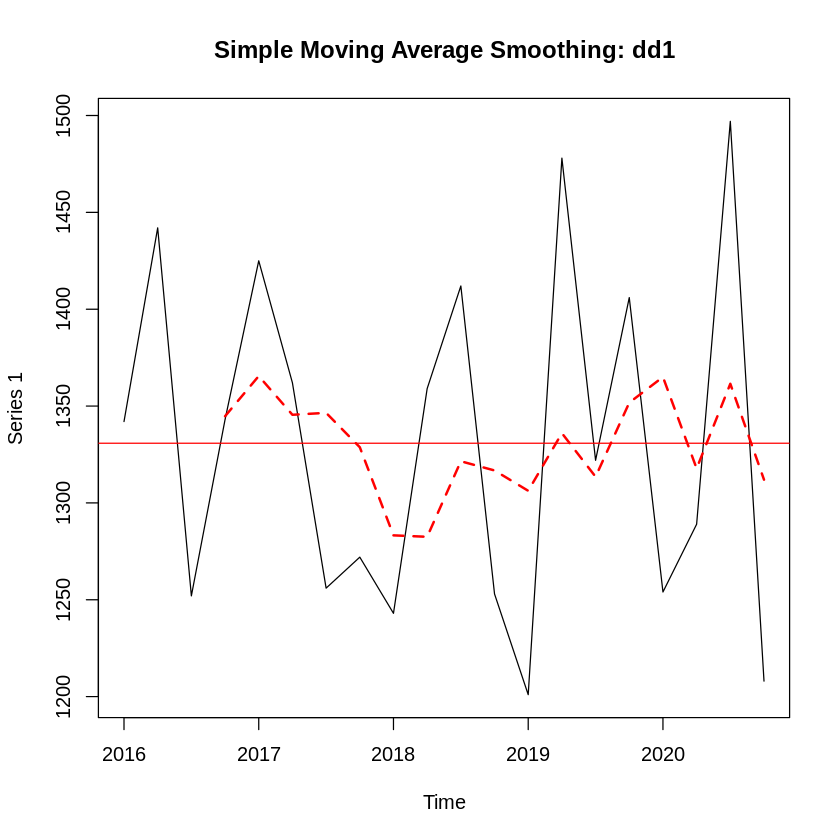

In [50]:
plot(dd1.ts, main="Simple Moving Average Smoothing: dd1")
lines(ff, col="red", lty=2, lwd=2) # fitted line 진한 빨강 점선으로 
abline(h=mean(dd1.ts), col="red")
# 과거의 관측치를 가지고 과거의 상태 변수 값을 추정.

In [51]:
res <- ff[-1:-3, ] - dd1.ts[-1:-3, ] # 실제 값과 예측된 값의 차이
# 이것이 residual이다. residual에서 패턴화 할 수 있는 조직적인 변동(확률적 변동)이 있다면 그 값은 우리가 모델로 잡아 내지 못한것이다.
# 따라서 residual에 확률적인 변동이 들어가 있으면 안된다.  
# 따라서 아래와 같이 residual에 대한 박스 테스트를 한다. 
Box.test(res) # 독립이며 자기상관이 없다는 H0 기각 불가 # 즉, 잔차는 독립적이다


	Box-Pierce test

data:  res
X-squared = 0.68668, df = 1, p-value = 0.4073


In [52]:
# 2. 이중 이동평균 평활법(Double Moving Average Smoothing)

( ff1 <- filter(dd1.ts, filter=rep(1, 3)/3, method="convolution", sides=1) ) # 평활상수 filter= 0.33 (m=3) #1번째
( ff2 <- filter(ff1, filter=rep(1, 3)/3, method="convolution", sides=1) ) # 평활상수 filter= 0.33 (m=3) #2번째

,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,1345.333,1345.667
2017,1340.000,1376.667,1347.667,1296.667
2018,1257.000,1291.333,1338.000,1341.333
2019,1288.667,1310.667,1333.667,1402.000
2020,1327.333,1316.333,1346.667,1331.333


,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,NA,NA
2017,1343.667,1354.111,1354.778,1340.333
2018,1300.444,1281.667,1295.444,1323.556
2019,1322.667,1313.556,1311.000,1348.778
2020,1354.333,1348.556,1330.111,1331.444


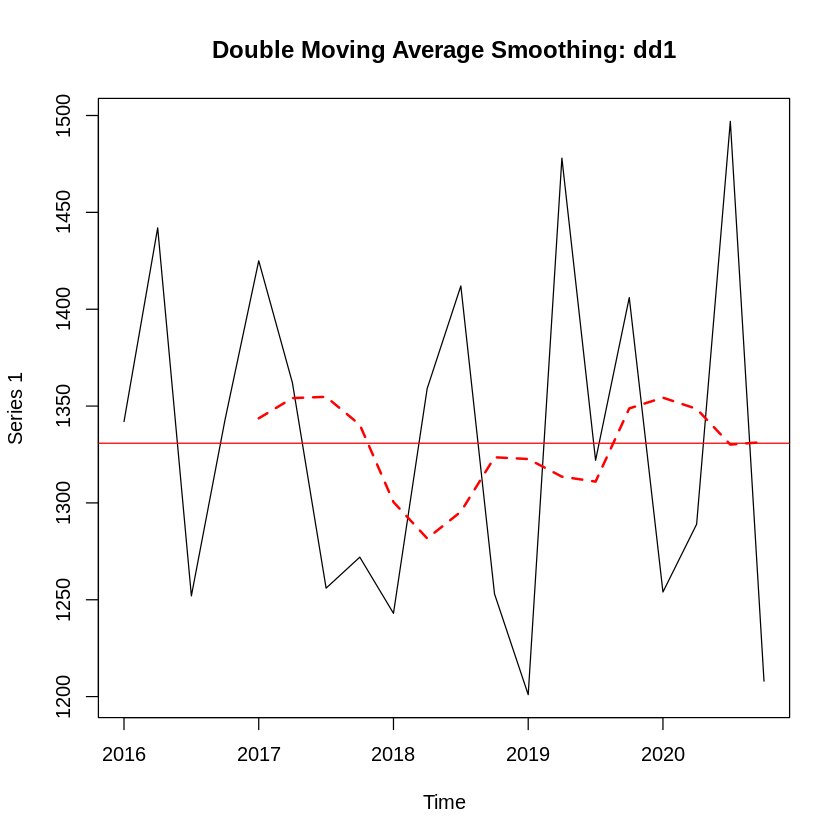

In [58]:
plot(dd1.ts, main="Double Moving Average Smoothing: dd1")
lines(ff2, col="red", lty=2, lwd=2) # fitted line 진한 빨강 점선으로 
abline(h=mean(dd1.ts), col="red")
# 앞보다 부드러워 지고 평균선에 가까워진 느낌.

In [60]:
ff2[-1:-4, ]

[1] 1343.667 1354.111 1354.778 1340.333 1300.444 1281.667 1295.444 1323.556
 [9] 1322.667 1313.556 1311.000 1348.778 1354.333 1348.556 1330.111 1331.444

In [61]:
 res <- ff2[-1:-4, ] - dd1.ts[-1:-4, ]
Box.test(res)


	Box-Pierce test

data:  res
X-squared = 0.737, df = 1, p-value = 0.3906


In [64]:
 res <- ff2[-1:-3, ] - dd1.ts[-1:-3, ]
Box.test(res)
# p-value가 약간 줄어들었다. 


	Box-Pierce test

data:  res
X-squared = 0.737, df = 1, p-value = 0.3906


In [65]:
# 3. 가중 이동평균 평활법(Weighted Moving Average Smoothing)

w1 <- c(0.4, 0.3, 0.2, 0.1) # 평활상수 filter = (0.4, 0.3, 0.2, 0.1) # 동일 가중이 아니라 다릉 가중치를 사용 
( ff3 <- filter(dd1.ts, filter=w1, method="convolution", sides=1) ) # 직전 시간에 40%, 그 이전 30% 등 차별 가중

,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,NA,1335.4
2017,1367.5,1366.1,1330.3,1300.5
2018,1266.2,1296.5,1348.3,1320.9
2019,1274.6,1343.3,1337.7,1374.7
2020,1335.6,1305.2,1376.9,1315.5


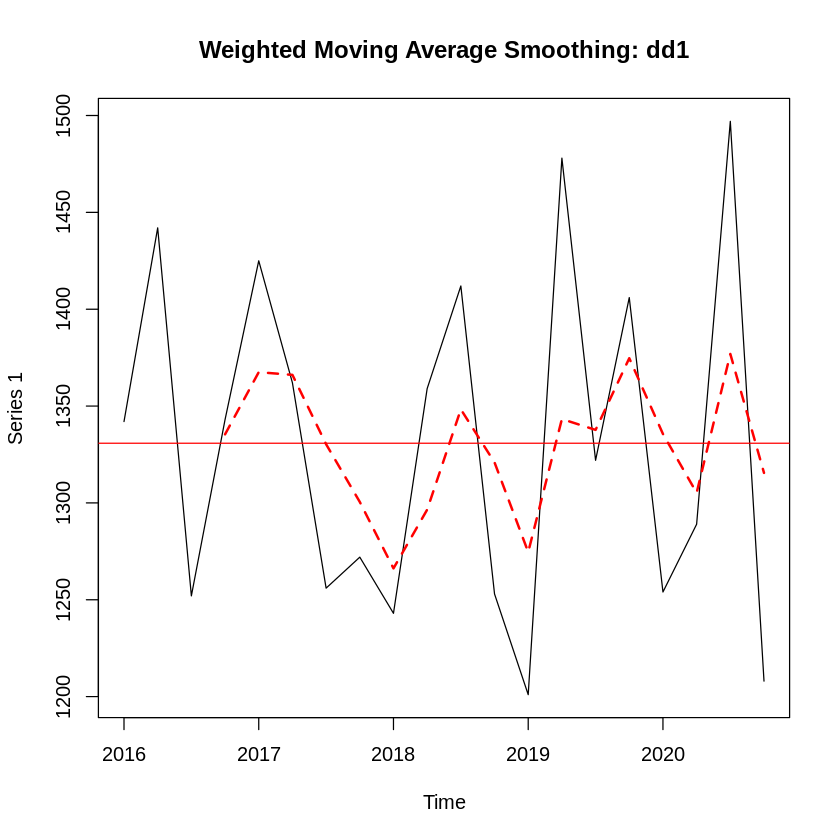

In [69]:
plot(dd1.ts, main="Weighted Moving Average Smoothing: dd1")
lines(ff3, col="red", lty=2, lwd=2) # fitted line 진한 빨강 점선으로 
abline(h=mean(dd1.ts), col="red")
# original data와 값이 조금 비슷함. --> original data의 변동성이랑 fitted된 data의 변동성이 비슷하게 가고있다.
# 즉, 잔차가 보다 변동성을 가지는 느낌. 


	Box-Pierce test

data:  res
X-squared = 1.2749, df = 1, p-value = 0.2588


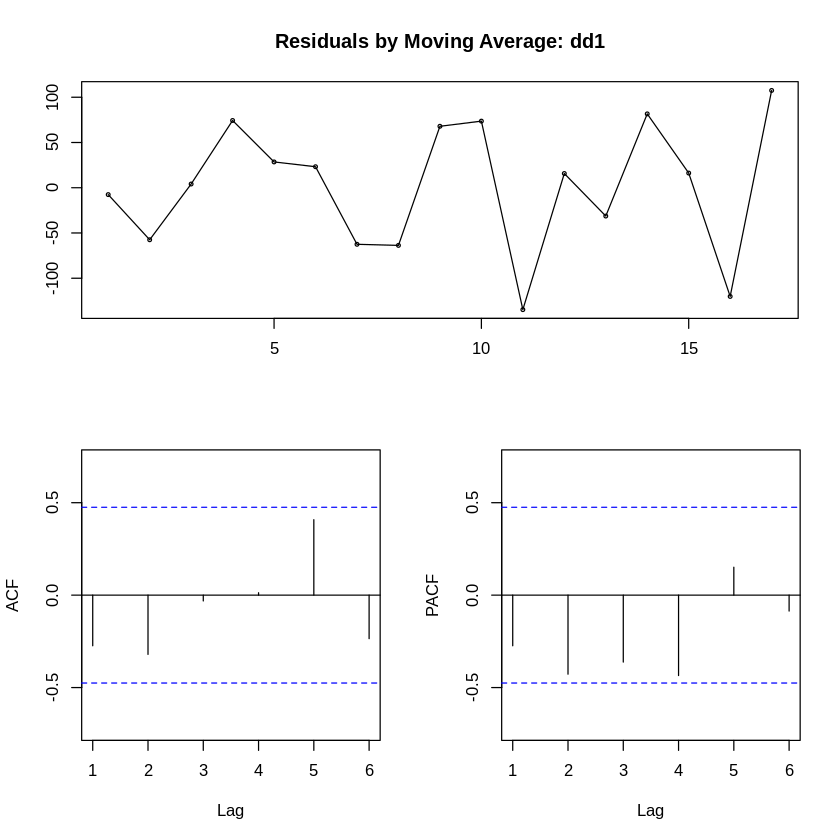

In [67]:
res <- ff3[-1:-3, ] - dd1.ts[-1:-3, ]
tsdisplay(res, main="Residuals by Moving Average: dd1")
Box.test(res) ## 자기상관은 없으나, Simple MA나 Double MA 보다는 p-value 낮음


In [70]:
# 4. 이중 가중 이동평균 평활법(Double Weight Moving Average Smoothing)

w1 <- c(0.4, 0.3, 0.2, 0.1)

ff3 <- filter(dd1.ts, filter=w1, method="convolution", sides=1) 
( ff4 <- filter(ff3, filter=w1, method="convolution", sides=1) )

,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,NA,NA
2017,NA,NA,1348.99,1329.26
2018,1299.30,1291.59,1311.56,1318.77
2019,1305.42,1318.71,1325.08,1347.31
2020,1348.52,1331.47,1346.91,1333.87


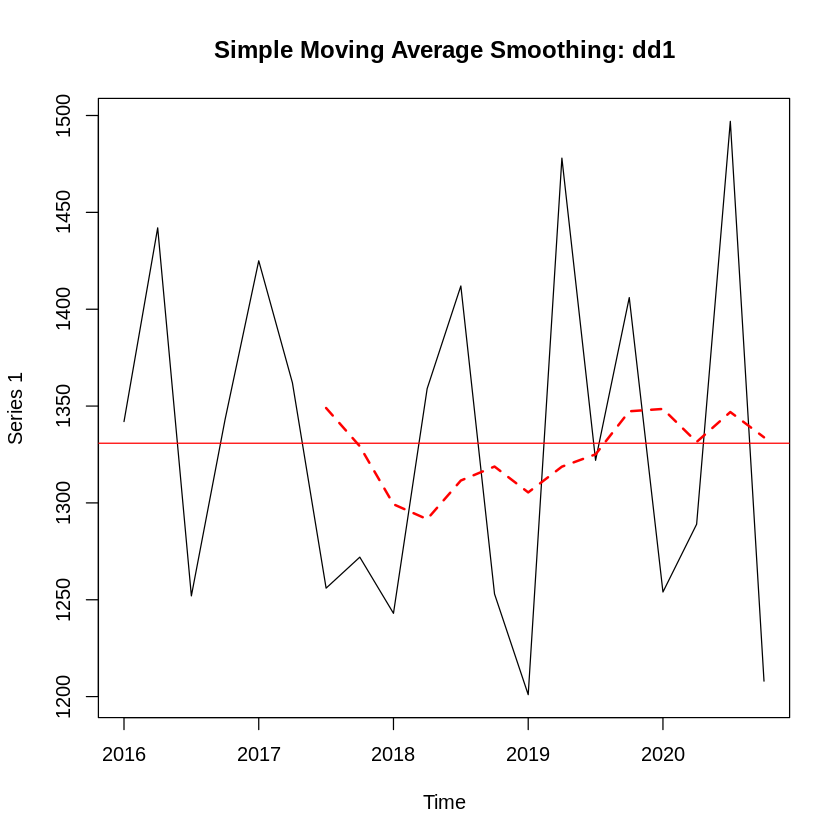

In [73]:
plot(dd1.ts, main="Simple Moving Average Smoothing: dd1")
lines(ff4, col="red", lty=2, lwd=2) # fitted line 진한 빨강 점선으로 
abline(h=mean(dd1.ts), col="red")
# 잔차가 커진거 같아보임, 스무싱이 많이 되어 보임. --> p-value가 (3)번 방법보다는 높아짐. 

In [72]:
res <- ff4[-1:-3, ] - dd1.ts[-1:-3, ]
Box.test(res)


	Box-Pierce test

data:  res
X-squared = 0.93339, df = 1, p-value = 0.334


In [76]:
f1 <- forecast(ff, h=1)
f2 <- forecast(ff2, h=1)
f3 <- forecast(ff3, h=1)
f4 <- forecast(ff4, h=1)
# 각 방법들(fitted value들)이 첫번째 분기가 값이 어느정도 될것이냐를 예측한 결과 

Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”
Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”
Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”
Warning message in ets(object, lambda = lambda, biasadj = biasadj, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”


In [75]:
print(f1)
print(f2)
print(f3)
print(f4)

        Point Forecast    Lo 80    Hi 80    Lo 95   Hi 95
2021 Q1       1330.823 1295.575 1366.071 1276.916 1384.73
        Point Forecast    Lo 80    Hi 80   Lo 95    Hi 95
2021 Q1       1331.444 1306.824 1356.065 1293.79 1369.098
        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2021 Q1       1329.126 1285.268 1372.984 1262.051 1396.201
        Point Forecast   Lo 80    Hi 80    Lo 95    Hi 95
2021 Q1       1333.871 1312.34 1355.403 1300.942 1366.801


In [79]:
# Point estimate : 점추정 --> 신뢰구간이 존재함, 따라서 Lo(Low)값과 Hi(High)값이 있음

# 위의 결과를 보니 3번(f3)가 예측한 갓이 제일 작다. 여기서 3번은 가장 p-value가 낮았다. 
# 따라서 조금은 낮게 예측한 것이 1분기에서는 맞는 값이다 라는 결론을 내릴 수 있다. 

### 요소분해(Decomposition)

In [80]:
# 1) 시계열 자료의 분해: Decompose 분석사례 (1) (가법모형)

In [90]:
# 기본 시계열 자료
# 랜덤한 자료 
dd <- matrix( c(1342, 1442, 1252, 1343, 	
                1425, 1362, 1256, 1272,
	              1243, 1359, 1412, 1253,					
                1201, 1478, 1322, 1406,
                1254, 1289, 1497, 1208))

dd.ts <- ts(data=dd, start=c(2016, 1), frequency=4)
dd.ts

,Qtr1,Qtr2,Qtr3,Qtr4
2016,1342,1442,1252,1343
2017,1425,1362,1256,1272
2018,1243,1359,1412,1253
2019,1201,1478,1322,1406
2020,1254,1289,1497,1208


In [101]:
# 계절변동 자료
# 값이 분기별로 올라가는 자료 -> 계절성이 있는 자료.
dd2 <- matrix( c(1142, 1242, 1452, 1543, 	
                1125, 1262, 1456, 1572,
	              1143, 1259, 1412, 1553,					
                1121, 1258, 1472, 1546,
                1154, 1249, 1477, 1548))

# 계절추세변동 자료
# 값이 분기별로, 년도 별로 올라가는 자료 -> 계절추세변동이 있는 자료 -> 이런것을 모를 경우에는 decomsiton해서 가법 모형으로 나타내서 알아내 본다. 
dd4 <- matrix( c(1142, 1242, 1452, 1543, 	
                1225, 1362, 1556, 1672,
	              1343, 1459, 1662, 1753,					
                1421, 1558, 1772, 1846,
                1554, 1649, 1877, 1948))

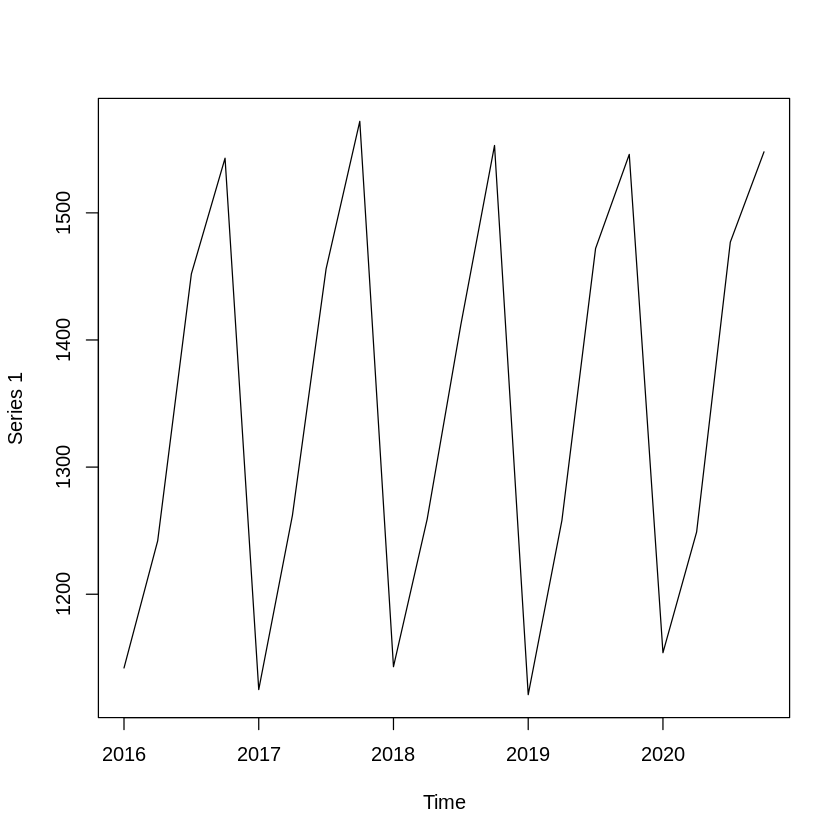

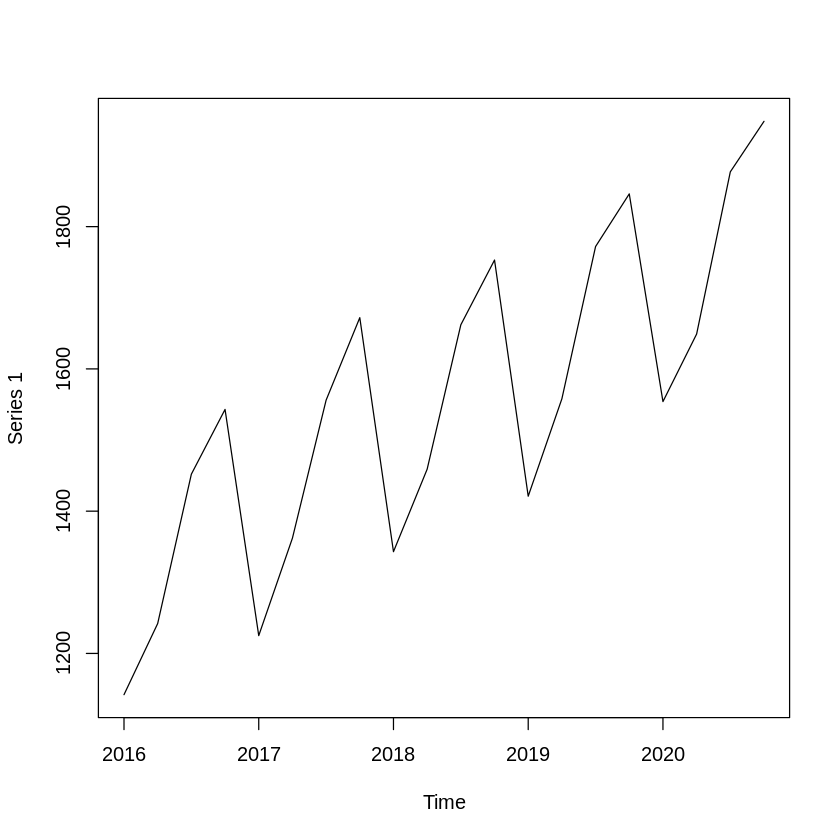

In [100]:
plot(dd2.ts)
plot(dd4.ts)

In [96]:
dd2.ts <- ts(data=dd2, start=c(2016, 1), frequency=4)
dd4.ts <- ts(dat=dd4, start=c(2016, 1), freq=4)

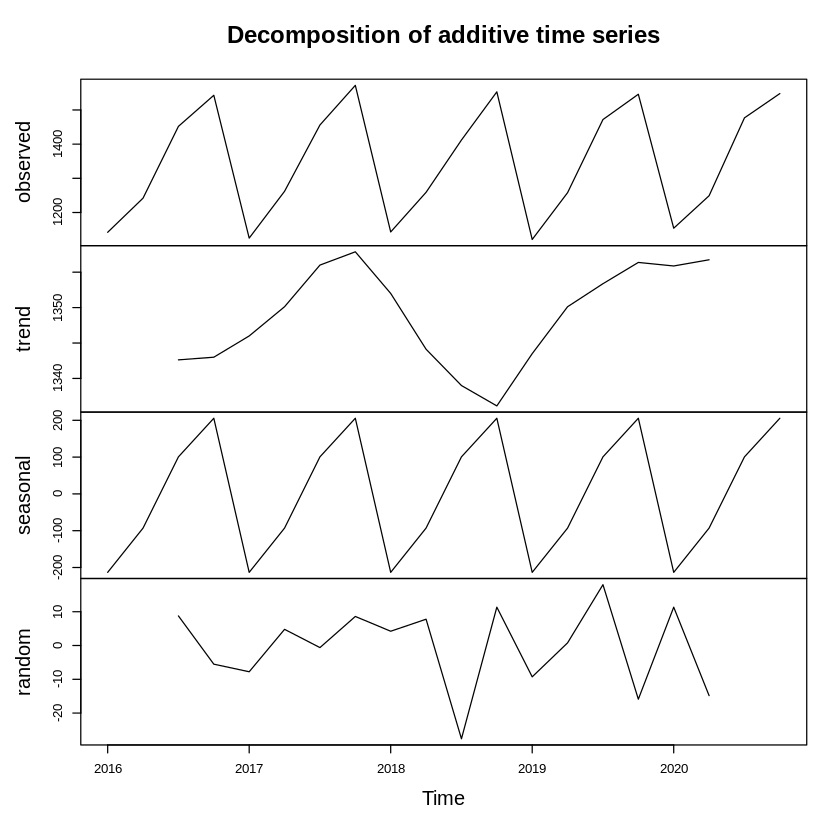

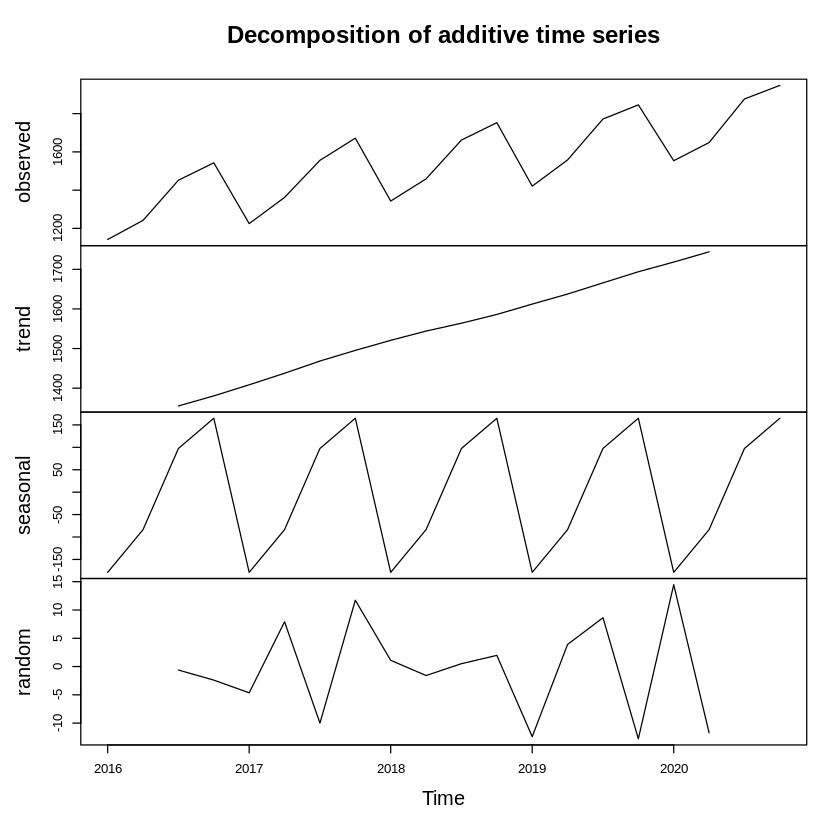

In [105]:
# 가법모형 
plot(decompose(dd2.ts, type="additive"))
# decomposition 후 랜덤 요인이 기계가 알아차릴수 있거나 패턴화된 요인이 있다면 decomposion을 완벽하게 하지 못한 것임.
# 따라서 랜덤 요인 중에 기계가 알아차릴수 있거나 패턴화된 요인이 없는 것은 decomposion을 잘한 것이다. 

plot(decompose(dd4.ts, type="additive"))

In [109]:
decompose(dd4.ts, type="a")

$x
     Qtr1 Qtr2 Qtr3 Qtr4
2016 1142 1242 1452 1543
2017 1225 1362 1556 1672
2018 1343 1459 1662 1753
2019 1421 1558 1772 1846
2020 1554 1649 1877 1948

$seasonal
           Qtr1       Qtr2       Qtr3       Qtr4
2016 -178.85156  -83.53906   97.49219  164.89844
2017 -178.85156  -83.53906   97.49219  164.89844
2018 -178.85156  -83.53906   97.49219  164.89844
2019 -178.85156  -83.53906   97.49219  164.89844
2020 -178.85156  -83.53906   97.49219  164.89844

$trend
         Qtr1     Qtr2     Qtr3     Qtr4
2016       NA       NA 1355.125 1380.500
2017 1408.500 1437.625 1468.500 1495.375
2018 1520.750 1544.125 1564.000 1586.125
2019 1612.250 1637.625 1665.875 1693.875
2020 1718.375 1744.250       NA       NA

$random
            Qtr1        Qtr2        Qtr3        Qtr4
2016          NA          NA  -0.6171875  -2.3984375
2017  -4.6484375   7.9140625  -9.9921875  11.7265625
2018   1.1015625  -1.5859375   0.5078125   1.9765625
2019 -12.3984375   3.9140625   8.6328125 -12.7734375
2020  14.47656

In [111]:
dd4_a <- decompose(dd4.ts, type="a")
names(dd4_a) # 분석결과의 내용

[1] "x"        "seasonal" "trend"    "random"   "figure"   "type"

In [112]:
dd4_a$seasonal # 계절변동 분석결과 

,Qtr1,Qtr2,Qtr3,Qtr4
2016,-178.85156,-83.53906,97.49219,164.89844
2017,-178.85156,-83.53906,97.49219,164.89844
2018,-178.85156,-83.53906,97.49219,164.89844
2019,-178.85156,-83.53906,97.49219,164.89844
2020,-178.85156,-83.53906,97.49219,164.89844


In [113]:
dd4_a$trend # 추세변동 분석결과

,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,1355.125,1380.500
2017,1408.500,1437.625,1468.500,1495.375
2018,1520.750,1544.125,1564.000,1586.125
2019,1612.250,1637.625,1665.875,1693.875
2020,1718.375,1744.250,NA,NA


In [114]:
dd4_a$random # 우연변동 분석결과

,Qtr1,Qtr2,Qtr3,Qtr4
2016,NA,NA,-0.6171875,-2.3984375
2017,-4.6484375,7.9140625,-9.9921875,11.7265625
2018,1.1015625,-1.5859375,0.5078125,1.9765625
2019,-12.3984375,3.9140625,8.6328125,-12.7734375
2020,14.4765625,-11.7109375,NA,NA


In [115]:
ddd1 <- dd4 - dd4_a$seasonal # 계절변동 제거자료 # 1320.852-178.852 = 1142 

In [116]:
ddd2 <- dd4 - dd4_a$trend # 추세변동 제거자료

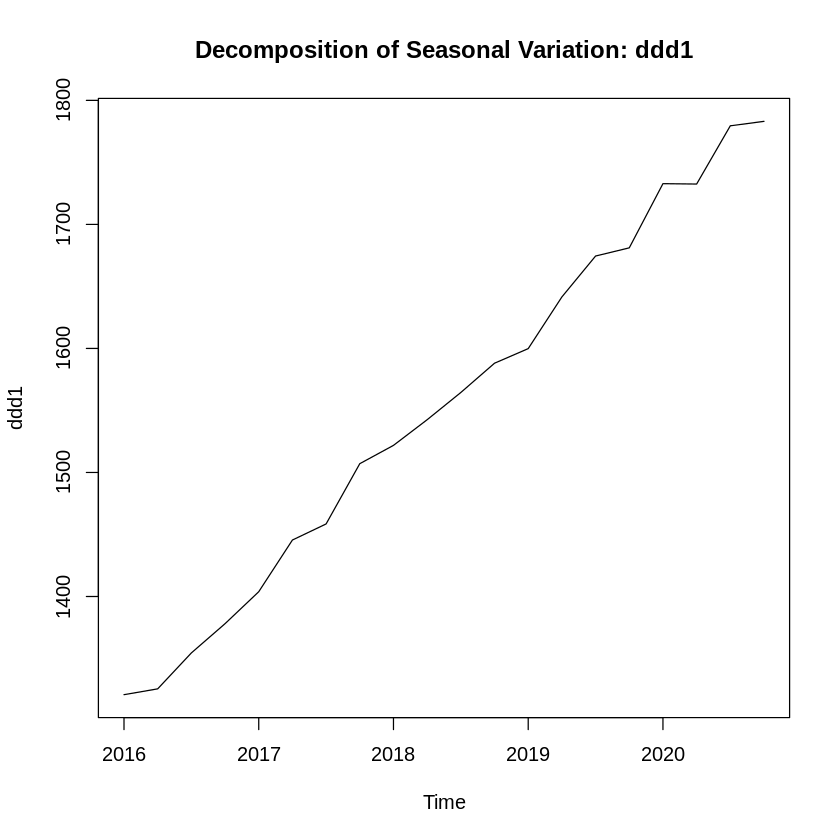

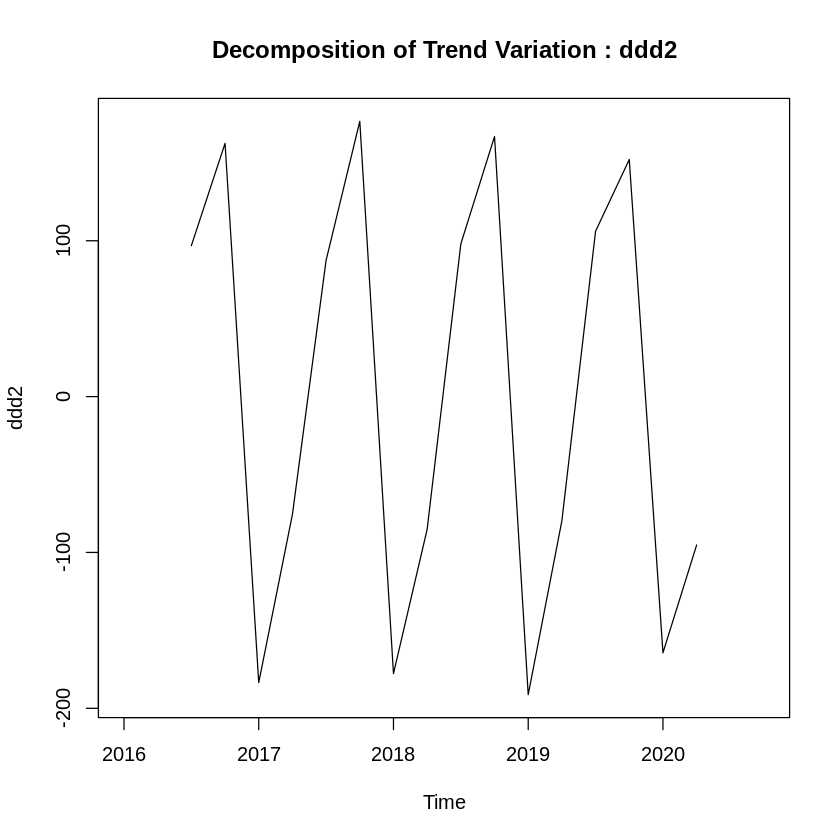

In [118]:
plot(ddd1, main="Decomposition of Seasonal Variation: ddd1") # 추세변동을 제거한 시계열 자료 : 추세변동 자료만 남음(랜덤요인 자료도 있긴함).
plot(ddd2, main="Decomposition of Trend Variation : ddd2") # 계절변동을 제거한 시계열 자료 : 계절변동 자료만 남음(랜덤요인 자료도 있긴함).

In [119]:
# 2) 시계열 자료의 분해: Decompose 분석사례 (2) (승법모형)

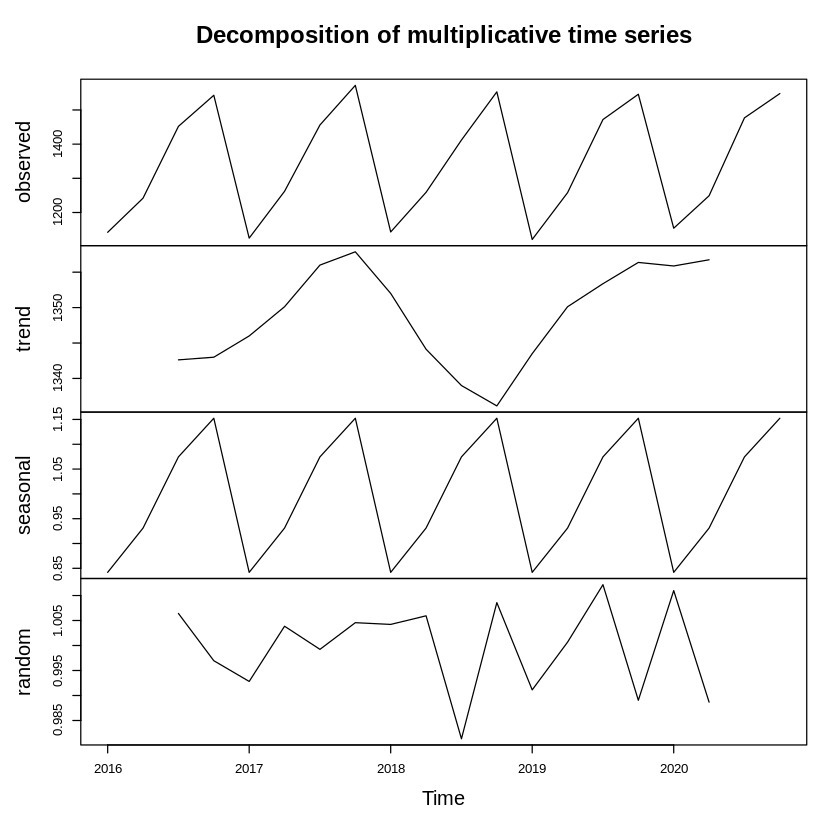

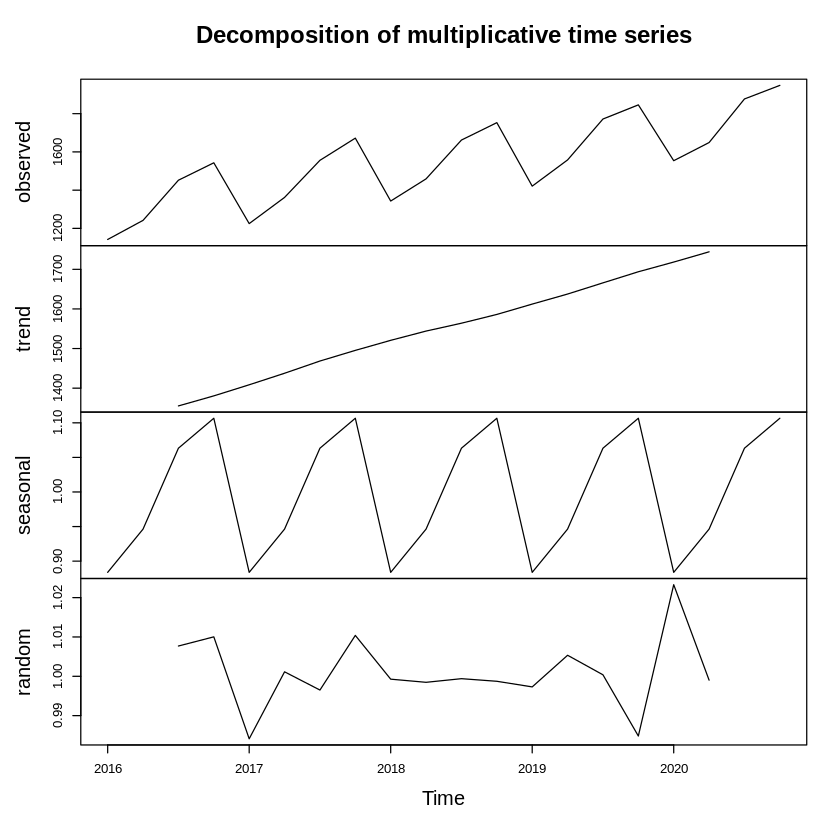

In [120]:
plot(decompose(dd2.ts, type="multiplicative"))
plot(decompose(dd4.ts, type="multiplicative"))

In [121]:
# 3) 시계열 자료의 분해: Decompose 분석사례 (3)

# (1) 분석자료: 국제 항공여객 자료 1960-1972

In [123]:
install.packages('TSA')
library(TSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [125]:
airpass

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1960,112,118,132,129,121,135,148,148,136,119,104,118
1961,115,126,141,135,125,149,170,170,158,133,114,140
1962,145,150,178,163,172,178,199,199,184,162,146,166
1963,171,180,193,181,183,218,230,242,209,191,172,194
1964,196,196,236,235,229,243,264,272,237,211,180,201
1965,204,188,235,227,234,264,302,293,259,229,203,229
1966,242,233,267,269,270,315,364,347,312,274,237,278
1967,284,277,317,313,318,374,413,405,355,306,271,306
1968,315,301,356,348,355,422,465,467,404,347,305,336
1969,340,318,362,348,363,435,491,505,404,359,310,337


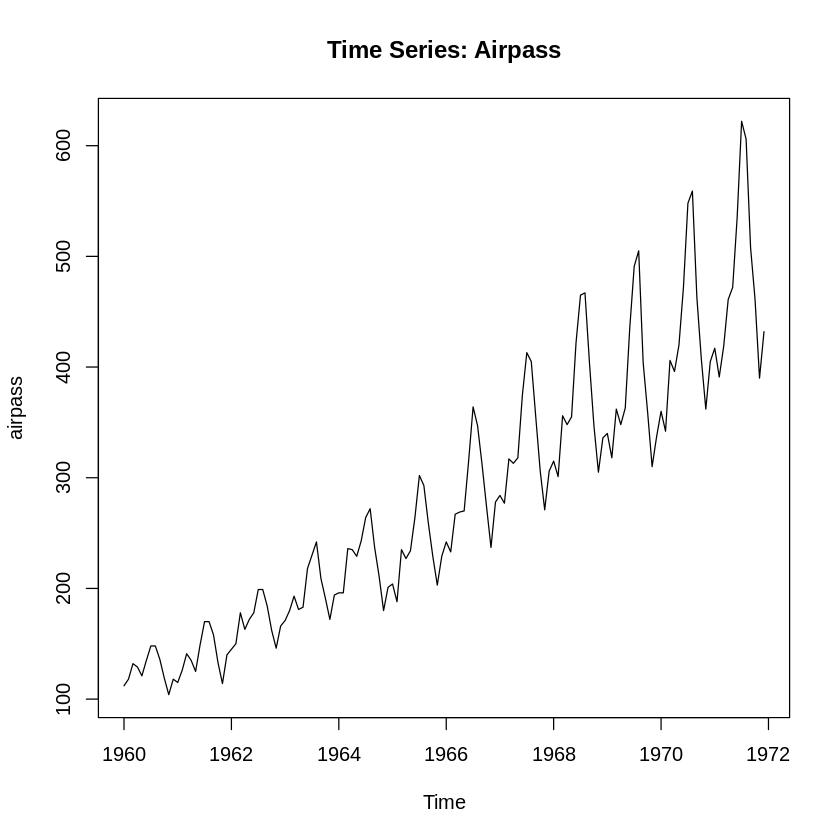

In [130]:
data(airpass)
plot(airpass, main="Time Series: Airpass")
# 계절 변동이 커지고 있다. -> 비선형적인 결합, 파라미터가 상수로 이루어저있는게 아니라 승법모형 즉, 곱으로 이루어지고 있는거 같다. 
# 비선형적인 결합과 선형적인 결합이 함께 있는거 같아 보인다. 


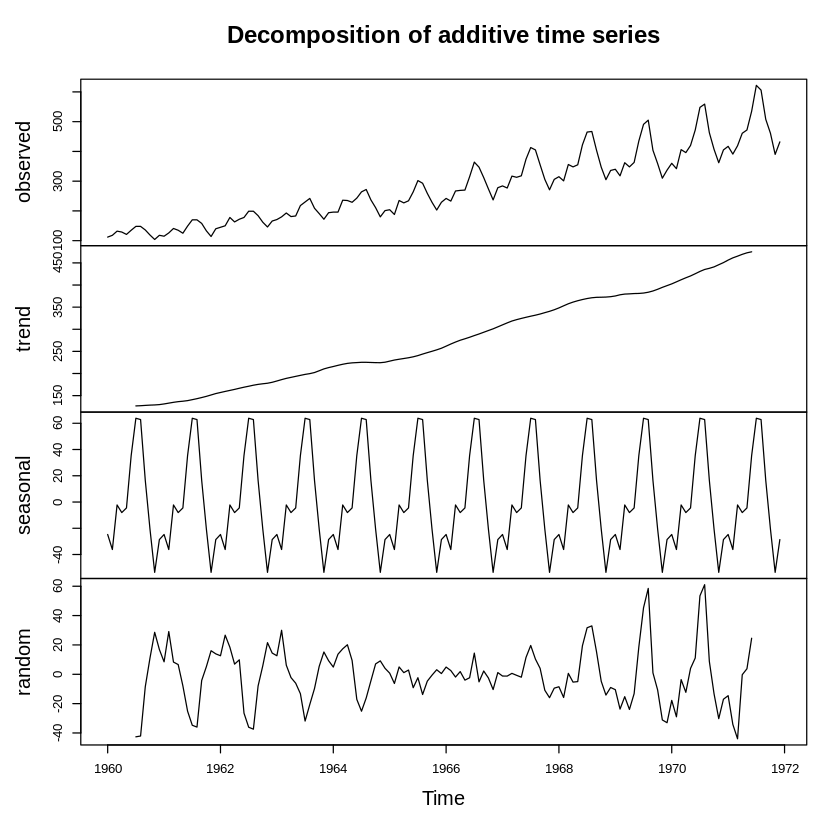

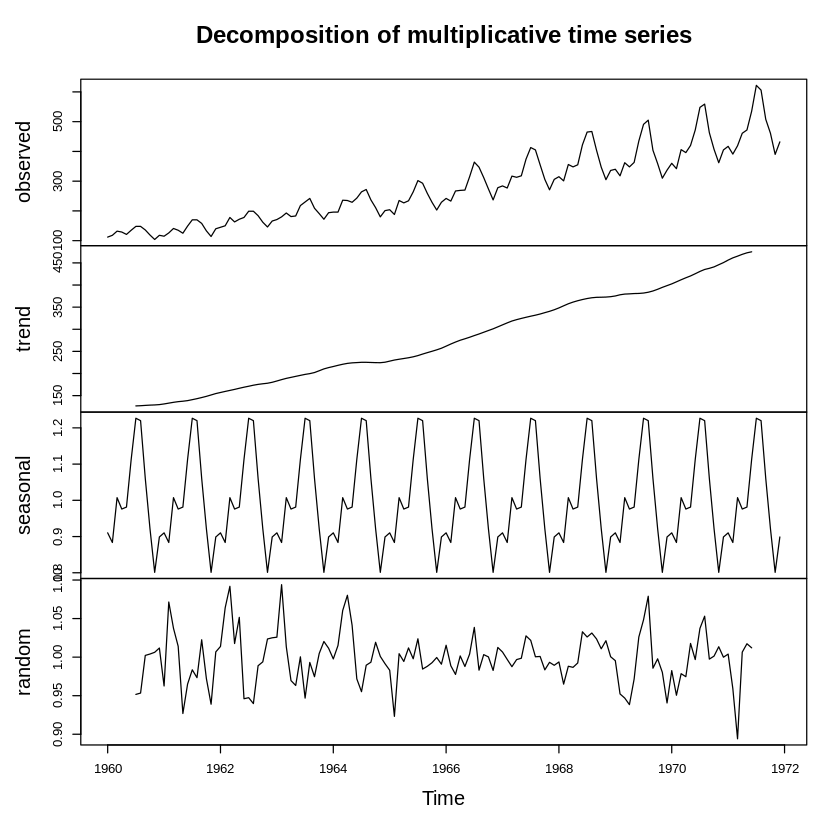

In [138]:
# (2) 가법(additive) 및 승법모형(multiplicative) 분석결과

plot(decompose(airpass, type="additive"))
# decompositon 결과를 보면 trend는 뚜렷하다.
# seasonal 변동도 패턴을 보이고 있기 때문에 decompositon이 잘되었다고 볼 수 있다.
# 근데 랜덤 요인 보니까 뭔가 패턴이 보임. -> 남아있는 잔차 요인이 랜덤 변동이 아니다. -> 아직 포착하지 못한 패턴 이 보인다. 
# 이것을 아래의 비선형적인 승법모형이 잡아 낸다.
plot(decompose(airpass, type="multiplicative"))

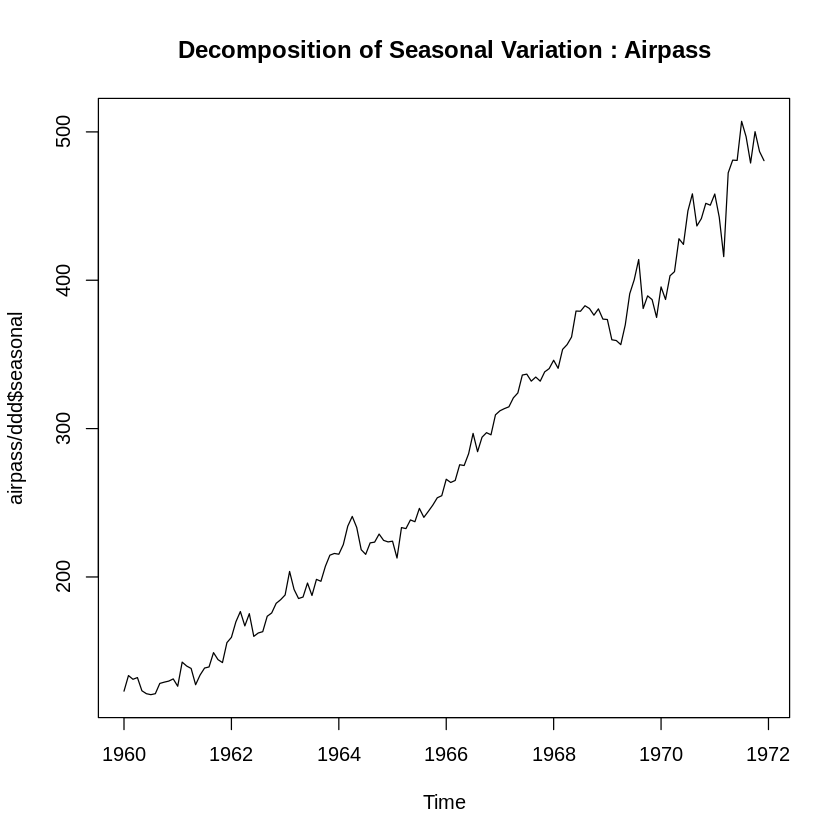

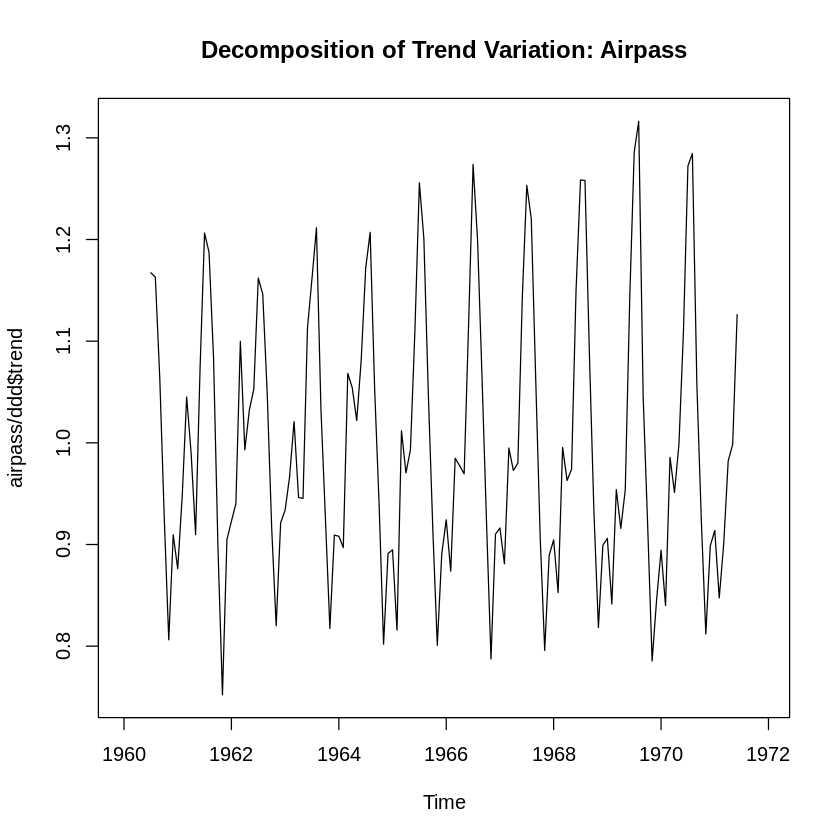

In [140]:
ddd = decompose(airpass, type="multiplicative")

plot(airpass/ddd$seasonal, main="Decomposition of Seasonal Variation : Airpass")  # 계절변동을 제거한 시계열 자료
# 결과를 보니, 계절성 변동을 완전히 제거한 것은 아니구나 -> 심도있는 방법이 더 필요하다. 

plot(airpass/ddd$trend, main="Decomposition of Trend Variation: Airpass") # 추세변동을 제거한 시계열 자료

In [141]:
 # decompose, tsdisplay: 요소분해법 적용사례

# (1) 요소분해 
decompose(dd1.ts)

$x
     Qtr1 Qtr2 Qtr3 Qtr4
2016 1342 1442 1252 1343
2017 1425 1362 1256 1272
2018 1243 1359 1412 1253
2019 1201 1478 1322 1406
2020 1254 1289 1497 1208

$seasonal
           Qtr1       Qtr2       Qtr3       Qtr4
2016 -38.382812  49.429688 -13.289062   2.242188
2017 -38.382812  49.429688 -13.289062   2.242188
2018 -38.382812  49.429688 -13.289062   2.242188
2019 -38.382812  49.429688 -13.289062   2.242188
2020 -38.382812  49.429688 -13.289062   2.242188

$trend
         Qtr1     Qtr2     Qtr3     Qtr4
2016       NA       NA 1355.125 1355.500
2017 1346.000 1337.625 1306.000 1282.875
2018 1302.000 1319.125 1311.500 1321.125
2019 1324.750 1332.625 1358.375 1341.375
2020 1339.625 1336.750       NA       NA

$random
           Qtr1       Qtr2       Qtr3       Qtr4
2016         NA         NA -89.835938 -14.742188
2017 117.382812 -25.054688 -36.710938 -13.117188
2018 -20.617188  -9.554688 113.789062 -70.367188
2019 -85.367188  95.945312 -23.085938  62.382812
2020 -47.242188 -97.179688        

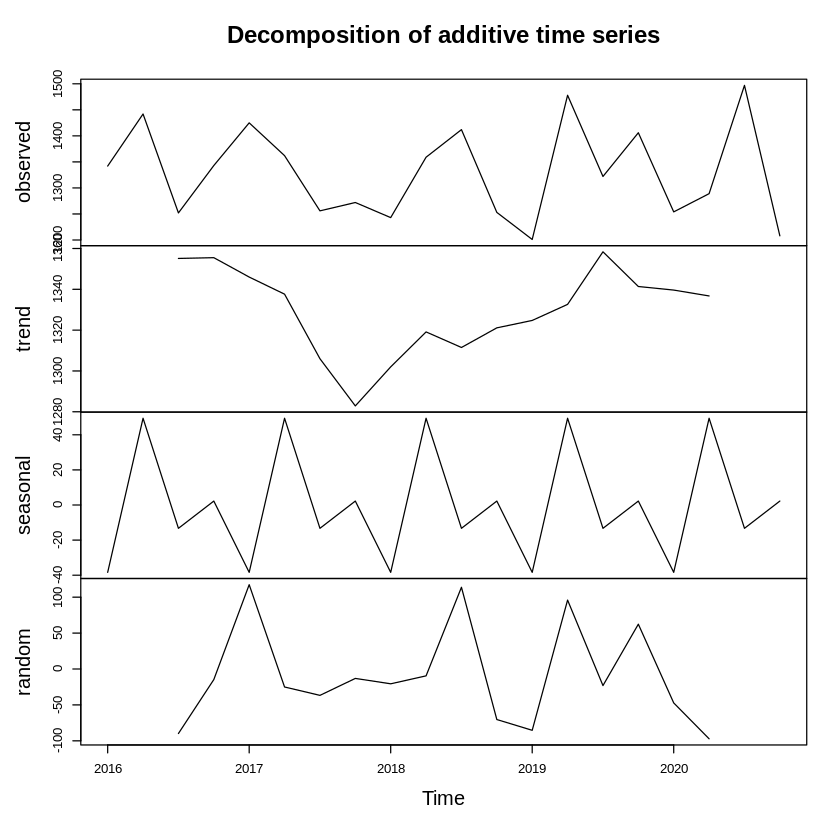

In [142]:
plot(decompose(dd1.ts))

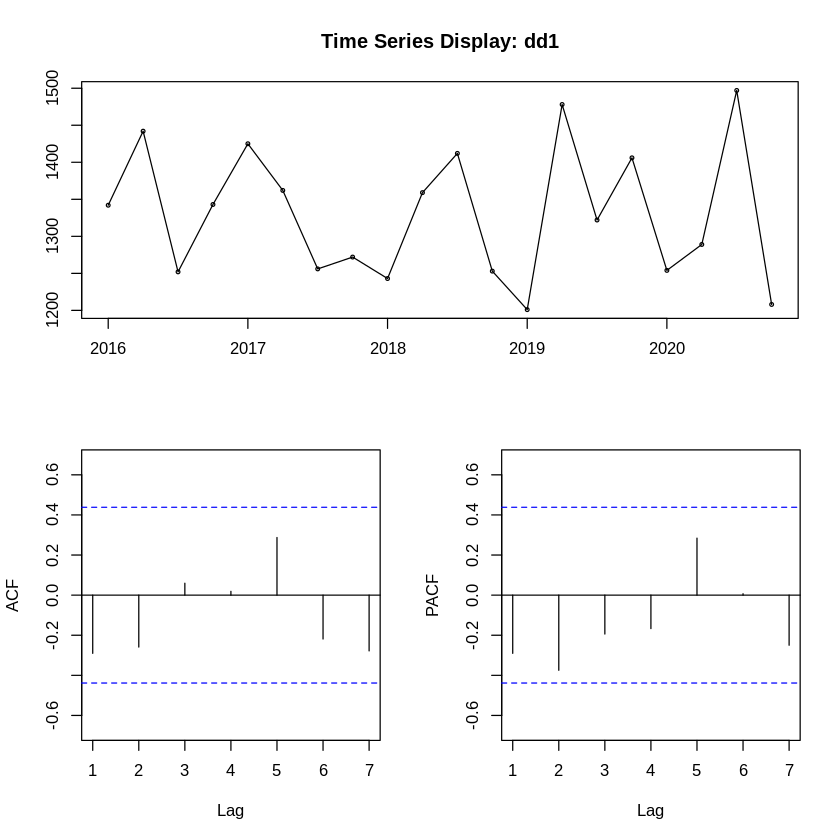

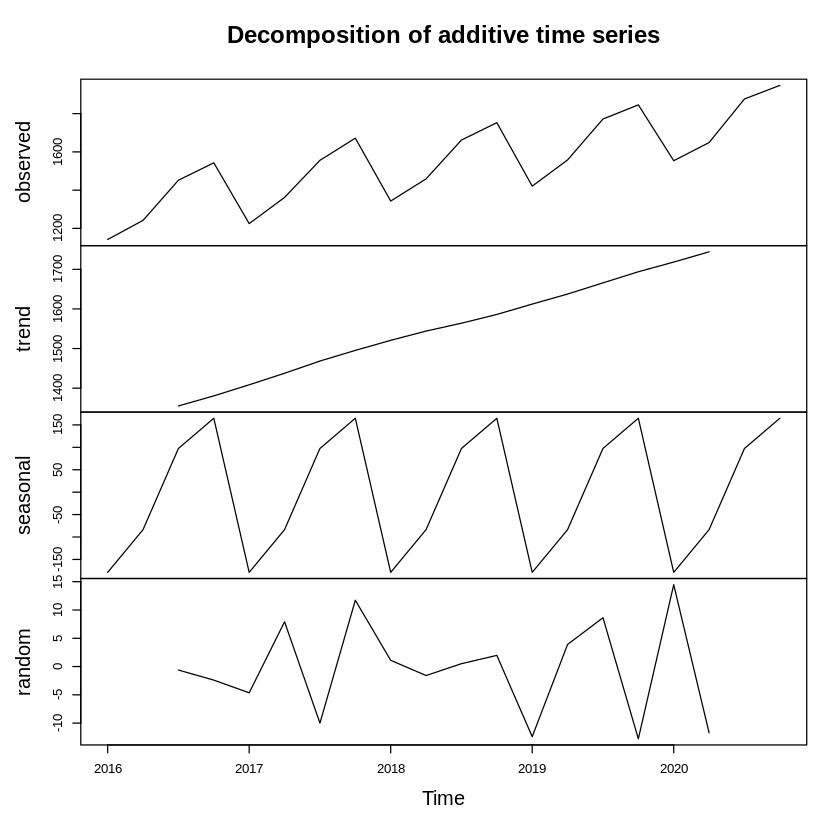

In [143]:
tsdisplay(dd1.ts, main="Time Series Display: dd1")
plot(decompose(dd4.ts))

In [144]:
# (2) 가법(additive) 및 승법모형(multiplicative) 검정결과

In [145]:
library(tseries)

da <- decompose(airpass, "addi")
dm <- decompose(airpass, "multi")

In [151]:
# decompositon 후 분해된 랜덤요인이 정상 시계열인지 확인.
kpss.test(da$random)

Warning message in kpss.test(da$random):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  da$random
KPSS Level = 0.016442, Truncation lag parameter = 4, p-value = 0.1


In [153]:
kpss.test(dm$random)
# KPSS Level이 그나마 커서 정상 시계열의 성격을 얻을 수 있었다.

Warning message in kpss.test(dm$random):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  dm$random
KPSS Level = 0.033058, Truncation lag parameter = 4, p-value = 0.1
